In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn
import jupyter
import sqlalchemy
import sklearn
import joblib
import notebook
import streamlit

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("scipy version:", scipy.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)
# print("jupyter version:", jupyter.__version__)
print("sqlalchemy version:", sqlalchemy.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)
print("streamlit version:", streamlit.__version__)
print("Jupyter Notebook version:", notebook.__version__)

numpy version: 1.26.4
pandas version: 2.2.1
scipy version: 1.13.0
matplotlib version: 3.8.4
seaborn version: 0.13.2
sqlalchemy version: 2.0.29
scikit-learn version: 1.3.2
joblib version: 1.3.1
streamlit version: 1.24.0
Jupyter Notebook version: 7.1.2


In [4]:
import scipy
import joblib
import psycopg2
import sqlalchemy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## Data Understanding

Dataset yang digunakan pada proyek ini adalah [Predict Students' Dropout and Academic Success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success). Dataset tersebut terdiri dari 4424 records data dan 37 features.

| Column Name                        | Description                                                                                                                                                  |
|------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital status                     | The marital status of the student. (Categorical)                                                                                                            |
| Application mode                   | The method of application used by the student. (Categorical)                                                                                                |
| Application order                  | The order in which the student applied. (Numerical)                                                                                                         |
| Course                             | The course taken by the student. (Categorical)                                                                                                              |
| Daytime/evening attendance         | Whether the student attends classes during the day or in the evening. (Categorical)                                                                          |
| Previous qualification             | The qualification obtained by the student before enrolling in higher education. (Categorical)                                                               |
| Nationality                        | The nationality of the student. (Categorical)                                                                                                               |
| Mother's qualification             | The qualification of the student's mother. (Categorical)                                                                                                    |
| Father's qualification             | The qualification of the student's father. (Categorical)                                                                                                    |
| Mother's occupation                | The occupation of the student's mother. (Categorical)                                                                                                       |
| Father's occupation                | The occupation of the student's father. (Categorical)                                                                                                       |
| Displaced                          | Whether the student is a displaced person. (Categorical)                                                                                                     |
| Educational special needs          | Whether the student has any special educational needs. (Categorical)                                                                                        |
| Debtor                             | Whether the student is a debtor. (Categorical)                                                                                                              |
| Tuition fees up to date            | Whether the student's tuition fees are up to date. (Categorical)                                                                                            |
| Gender                             | The gender of the student. (Categorical)                                                                                                                    |
| Scholarship holder                 | Whether the student is a scholarship holder. (Categorical)                                                                                                  |
| Age at enrollment                  | The age of the student at the time of enrollment. (Numerical)                                                                                               |
| International                      | Whether the student is an international student. (Categorical)                                                                                              |
| Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical)                                                                 |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical)                                                                 |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical)                                                               |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical)                                                                 |


## Gathering Data

In [5]:
import pandas as pd
df = pd.read_csv("students_performance.csv", encoding='windows-1252', sep=';')

## Data Assessing & Data Cleaing

Data Assessing  adalah proses mengidentifikasi dan memahami data yang ada, termasuk mengeksplorasi struktur, kualitas dan kegunaan data. Hal ini melibatkan identifikasi masalah seperti data yang hilang, duplikat data, atau data yang tidak valid, serta mengevaluasi kesesuaian data untuk tujuan analitis atau penggunaan lainnya.

Data Cleaning adalah proses mengatasi masalah yang ditemukan selama penilaian data, seperti mengisi nilai yang hilang, menghapus duplikat data, atau memperbaiki format yang salah. Tujuannya adalah untuk memastikan data bersih, konsisten, dan siap digunakan dalam analisis atau pemodelan lebih lanjut.


In [59]:
# preview dataset
df.head(1)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,0


In [7]:
# view dimensions of dataset
df.shape

(4424, 37)

In [8]:
# view statistical properties of dataset
df.describe()

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿Marital_status                             4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [10]:
# rename feature / column name
df.rename(columns = {'ï»¿Marital_status':'Marital_status','Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [11]:
# check for missing value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nationality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [12]:
print("Jumlah duplicated data: ", df.duplicated().sum())

Jumlah duplicated data:  0


In [13]:
print(df["Status"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [14]:
df['Status'] = df['Status'].map({'Dropout':0,'Graduate':1,'Enrolled':2})

In [15]:
print(df["Status"].unique())

[0 1 2]


In [16]:
print(df["Status"].unique())
print(df["Status"].value_counts())

[0 1 2]
Status
1    2209
0    1421
2     794
Name: count, dtype: int64


In [17]:
# review dataset
df['Status'].head()

0    0
1    1
2    0
3    1
4    1
Name: Status, dtype: int64

## Pre-processing Data

Sebelum melakukan tahapan pengembangan model machine learning, penting untuk mengetahui hubungan korelasi antar feature.

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun).



In [18]:
df.corr()['Status']

Marital_status                                 -0.074310
Application_mode                               -0.116928
Application_order                               0.027393
Course                                          0.024210
Daytime_evening_attendance                      0.066439
Previous_qualification                         -0.027984
Previous_qualification_grade                    0.025096
Nationality                                     0.002098
Mothers_qualification                          -0.075941
Fathers_qualification                          -0.035183
Mothers_occupation                              0.051664
Fathers_occupation                              0.051455
Admission_grade                                 0.038716
Displaced                                       0.070649
Educational_special_needs                       0.003751
Debtor                                         -0.154802
Tuition_fees_up_to_date                         0.342121
Gender                         

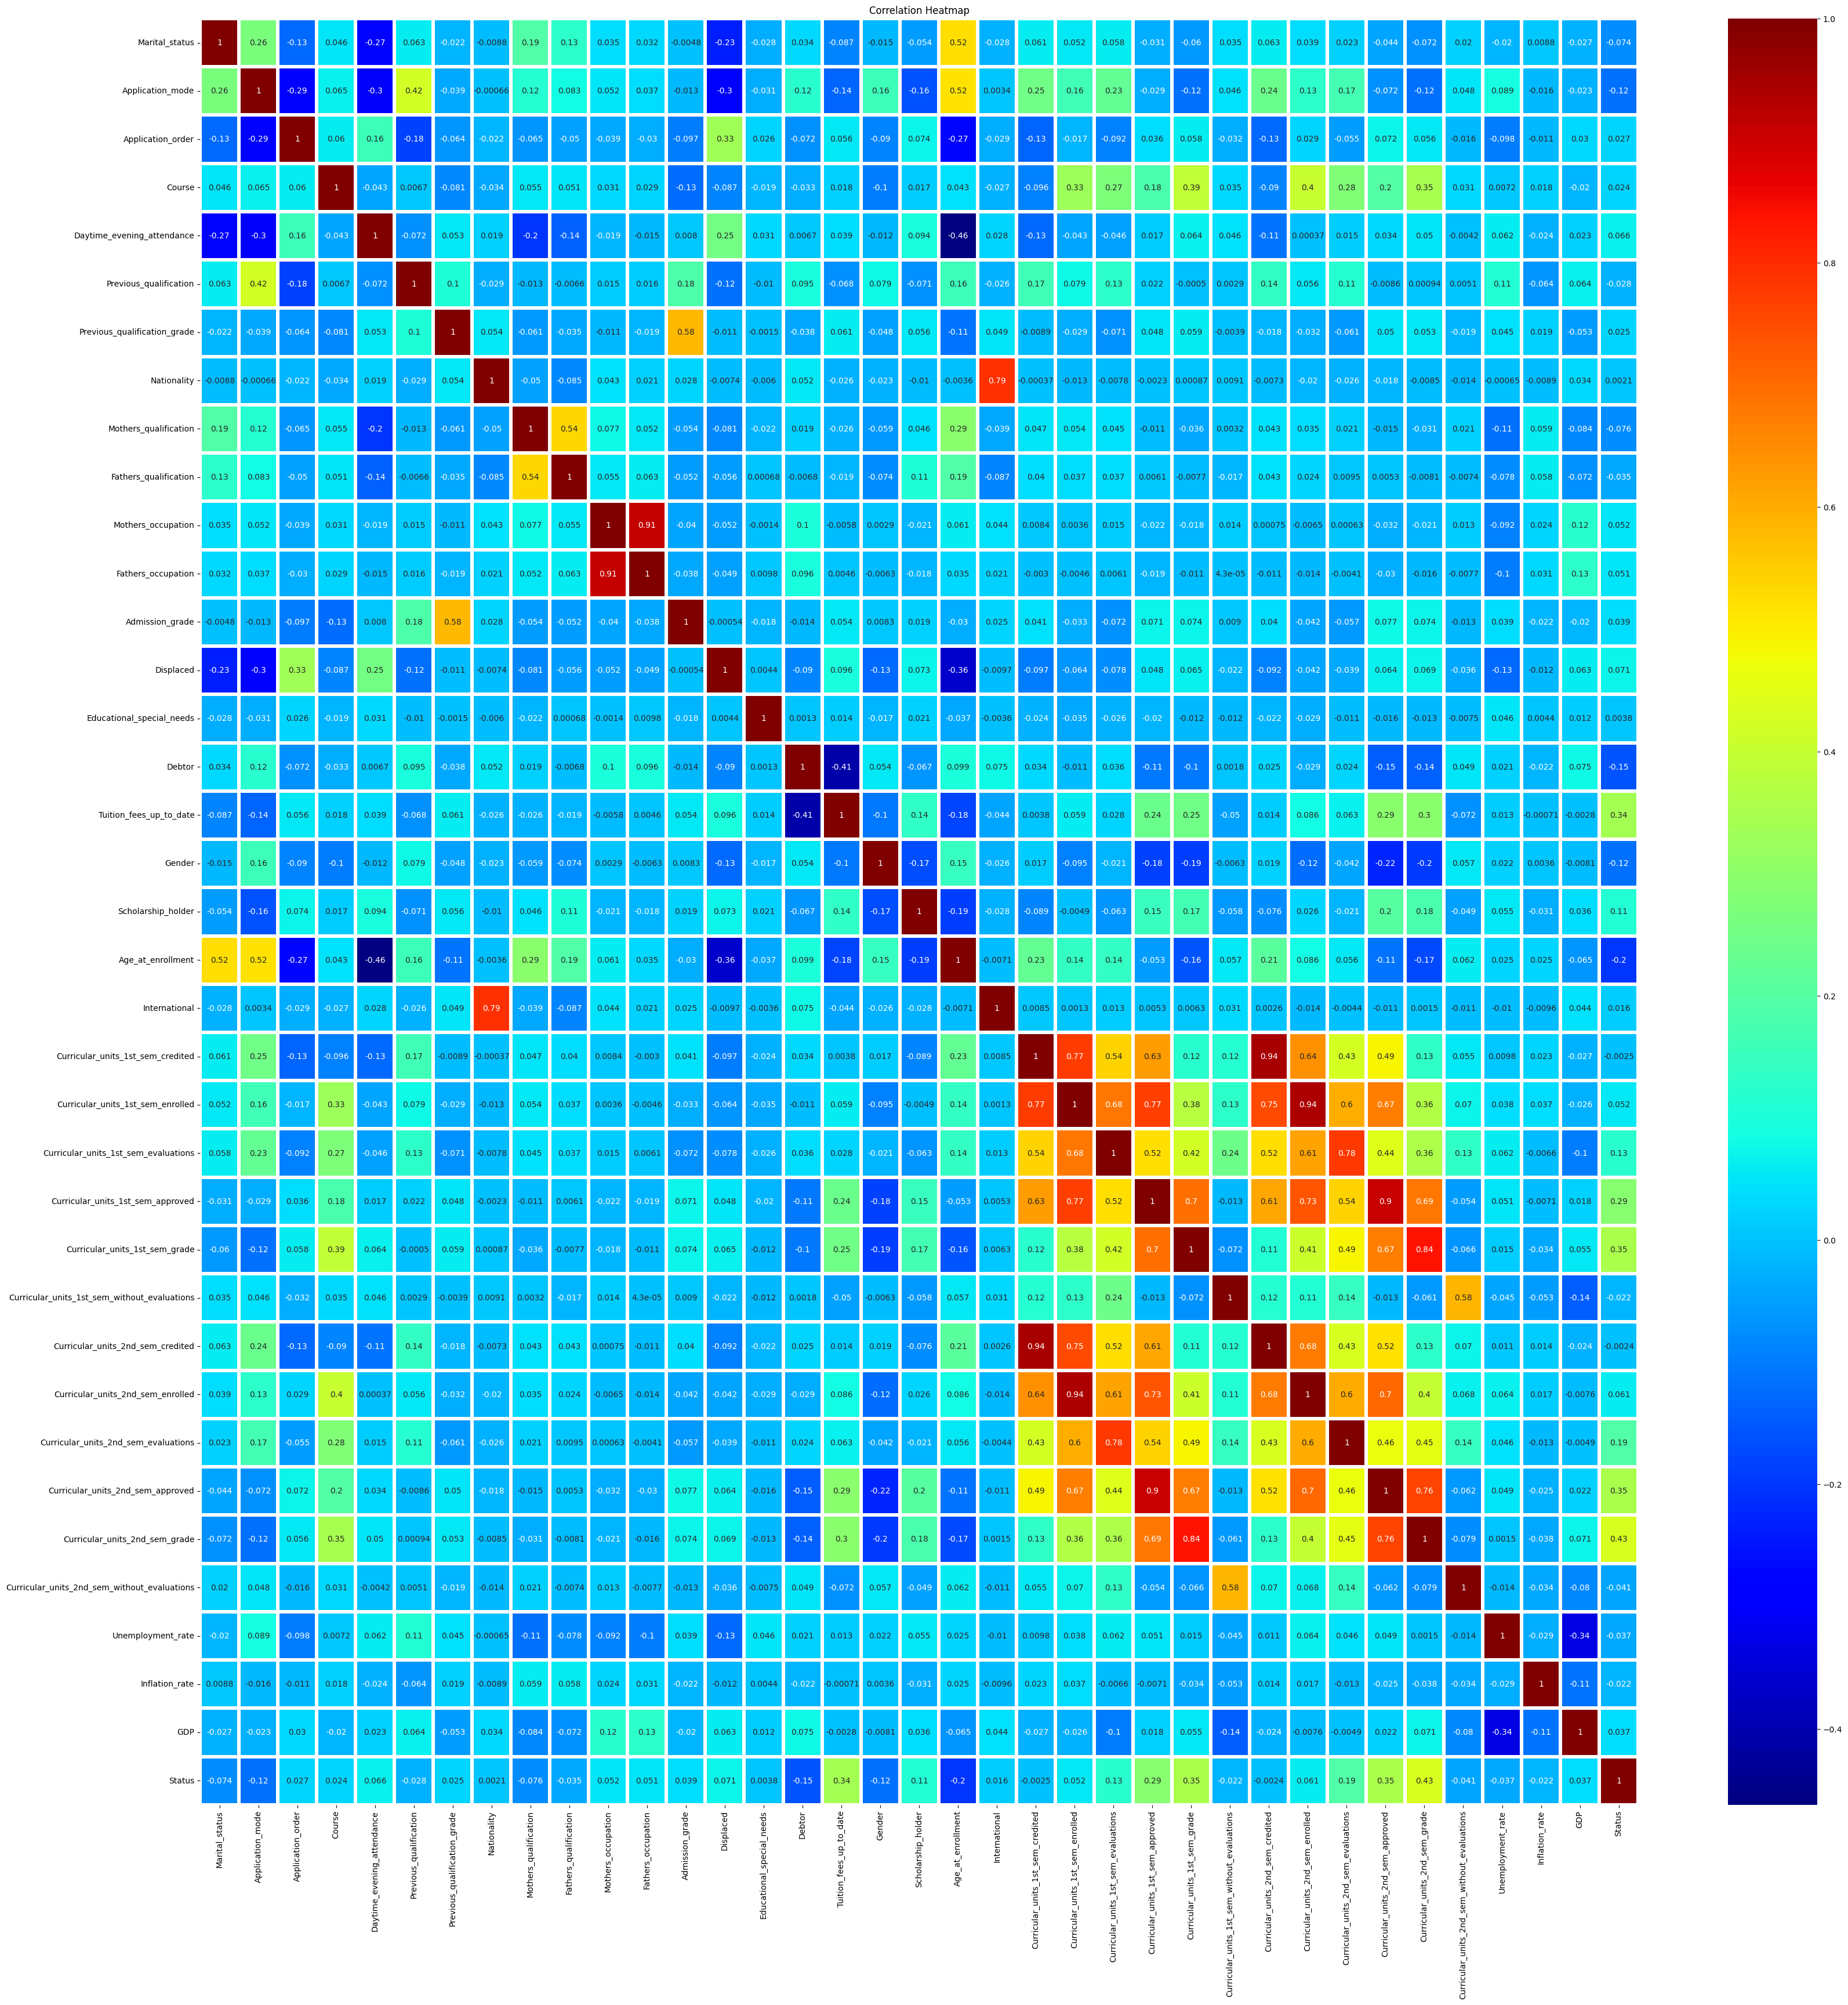

In [19]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr() , annot=True, cmap='jet', linecolor='white', linewidth=3)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# drop feature yang memiliki tingkat korelasi rendah
# df = df.drop(columns=['Nationality',
#                                   'Fathers_qualification',
#                                   'Mothers_occupation',
#                                   'Fathers_occupation',
#                                   'Educational_special_needs',
#                                   'International',
#                                   'Unemployment_rate',
#                                   'Inflation_rate'], axis=1)

Berdasarkan hasil eksperimen yang telah dilakukan yaitu dengan melakukan dropping pada feature-feature yang memiliki korelasi rendah. Didapatkan bahwa hasil akurasi atau performa model tidak menunjukkan perbedaan yang siginifikan, bahkan pada beberapa model mengalami penurunan. Sehingga pada kasus ini, tidak akan dilakukan dropping pada feature-feature tersebut.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah proses penyelidikan awal terhadap data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi dalam data. Teknik ini biasanya menggunakan bantuan statistik dan representasi atau visualisasi grafis.

Membuat histogram untuk setiap feature numerik data

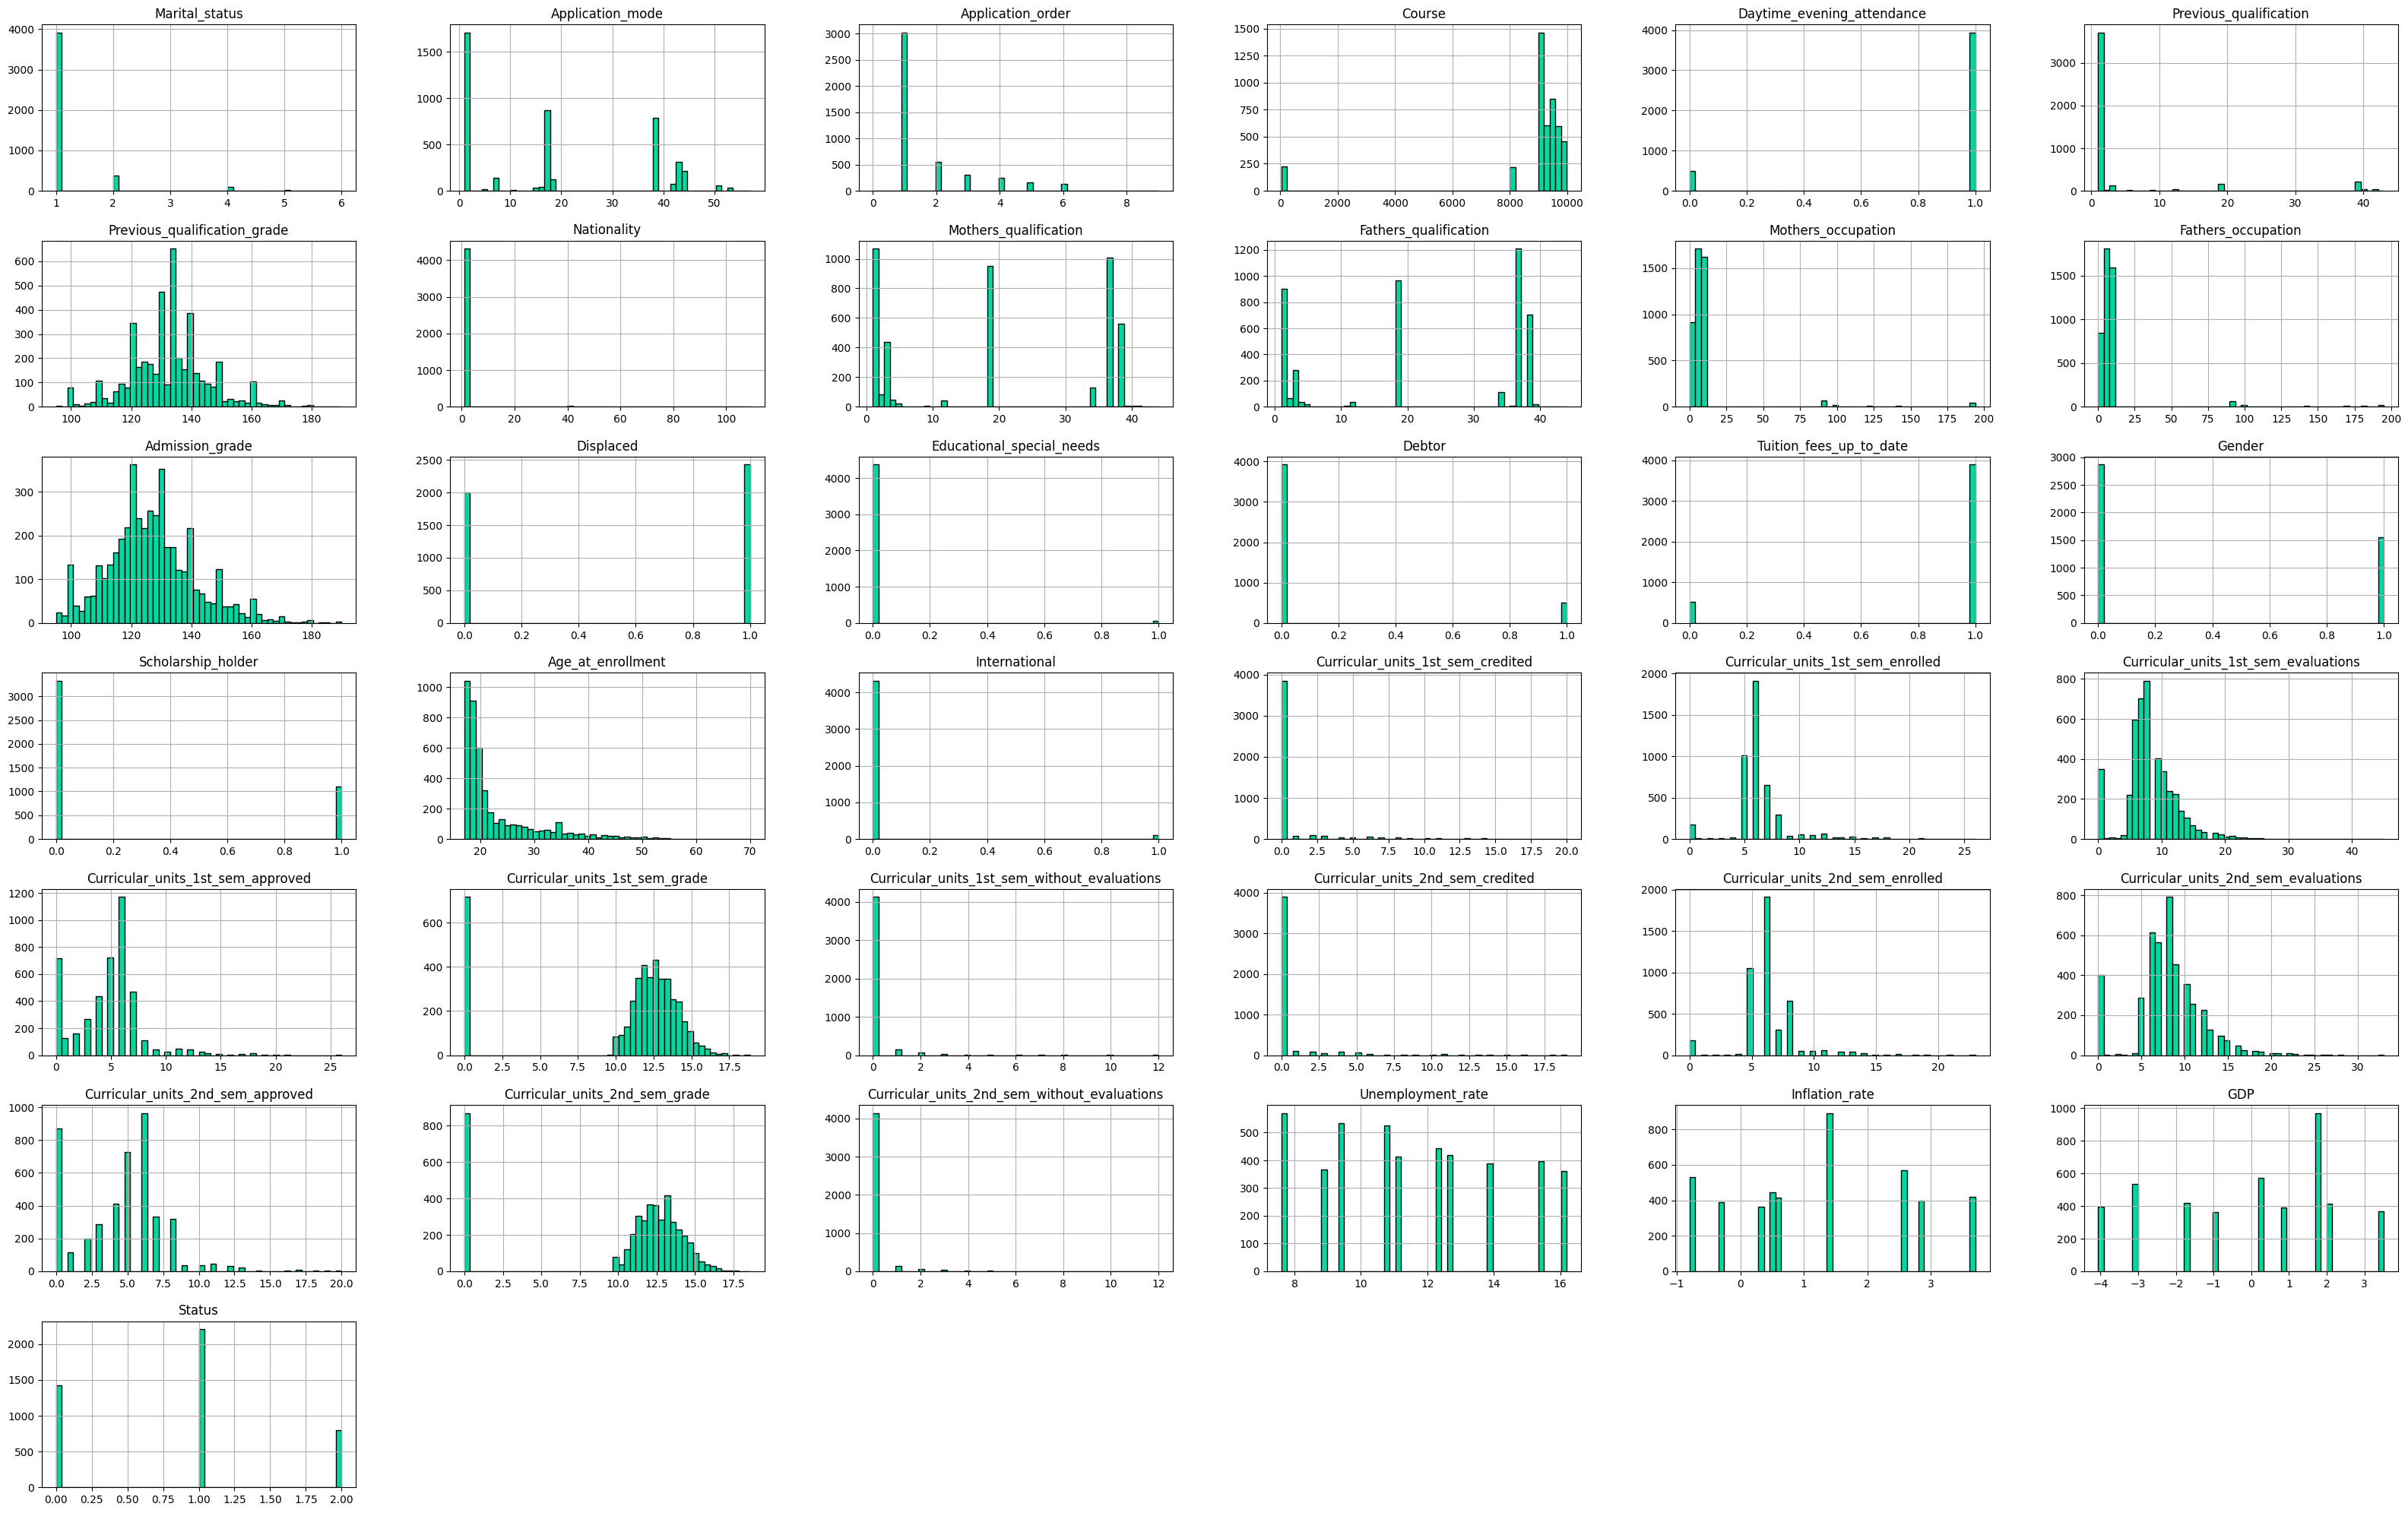

In [21]:
df.hist(bins=50, figsize=(40, 25), color='#06D6A0', edgecolor='black')
plt.show()

Berikut adalah perbandingan jumlah & presentase dari siswa yang dropout, enrolled, dan graduate.

In [22]:
eda_df = df.copy()

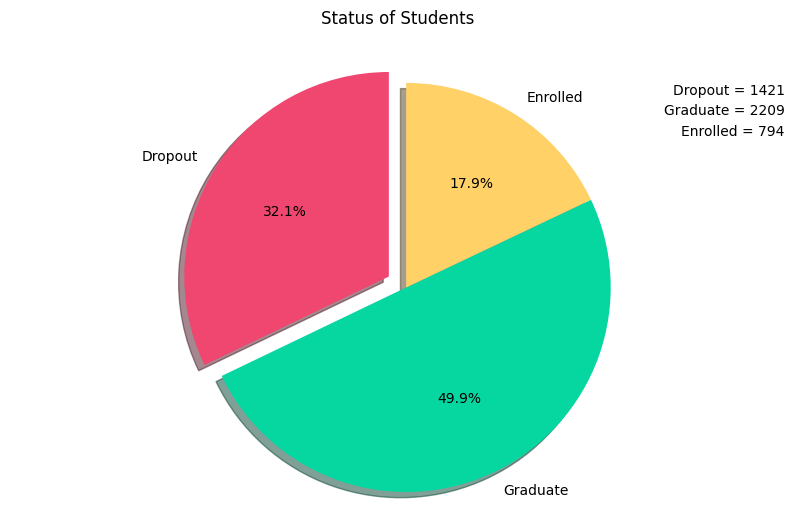

In [23]:
dropout_count = eda_df[eda_df['Status'] == 0].shape[0]
graduate_count = eda_df[eda_df['Status'] == 1].shape[0]
enrolled_count = eda_df[eda_df['Status'] == 2].shape[0]

sizes = [dropout_count, graduate_count, enrolled_count]
labels = ['Dropout', 'Graduate', 'Enrolled']
colors = ['#EF476F', '#06D6A0', '#FFD166']
explode = (0.1, 0, 0)  # Pecahkan sedikit bagian dropout

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Status of Students', pad=20)

plt.text(1.85, 1, f"Dropout = {dropout_count}", fontsize=10, color='black', ha='right', va='top')
plt.text(1.85, 0.90, f"Graduate = {graduate_count}", fontsize=10, color='black', ha='right', va='top')
plt.text(1.85, 0.80, f"Enrolled = {enrolled_count}", fontsize=10, color='black', ha='right', va='top')

plt.show()

Pada visualisasi di atas dapat diketahui bahwa jumlah siswa yang dropout sebesar 32.1% atau sebanyak 1421 siswa, angka tersebut tidaklah sedikit. Sementara untuk jumlah siswa dengan status Graduate sebanyak 2209 siswa (49.9%) dan Enrolled sebanyak 794 siswa (17.9%)

In [24]:
eda_df['Debtor'] = eda_df['Debtor'].map({0: 'No', 1: 'Yes'})
eda_df['Gender'] = eda_df['Gender'].map({0: 'Female', 1: 'Male'})
eda_df['Displaced'] = eda_df['Displaced'].map({0: 'No', 1: 'Yes'})
eda_df['International'] = eda_df['International'].map({0: 'No', 1: 'Yes'})
eda_df['Scholarship_holder'] = eda_df['Scholarship_holder'].map({0: 'No', 1: 'Yes'})
eda_df['Tuition_fees_up_to_date'] = eda_df['Tuition_fees_up_to_date'].map({0: 'No', 1: 'Yes'})
eda_df['Educational_special_needs'] = eda_df['Educational_special_needs'].map({0: 'No', 1: 'Yes'})
eda_df['Daytime_evening_attendance'] = eda_df['Daytime_evening_attendance'].map({0: 'Evening', 1: 'Daytime'})
eda_df['Marital_status'] = eda_df['Marital_status'].map({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto union', 6: 'Legally separated'})
eda_df['Nationality'] = eda_df['Nationality'].map({
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English',
    17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
    26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'})
eda_df['Course'] = eda_df['Course'].map({
    33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)', 9003: 'Agronomy', 9070: 'Communication Design',
    9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture',
    9147: 'Management', 9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing',
    9556: 'Oral Hygiene', 9670: 'Advertising and Marketing Management', 9773: 'Journalism and Communication',
    9853: 'Basic Education', 9991: 'Management (evening attendance)'})

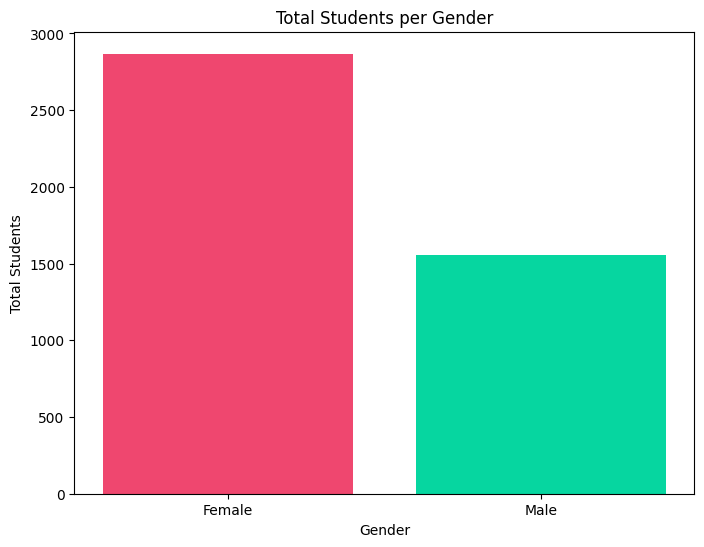

In [25]:
colors = ['#EF476F', '#06D6A0']
total_students_per_gender = eda_df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(total_students_per_gender.index, total_students_per_gender.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Total Students')
plt.title('Total Students per Gender')
plt.show()

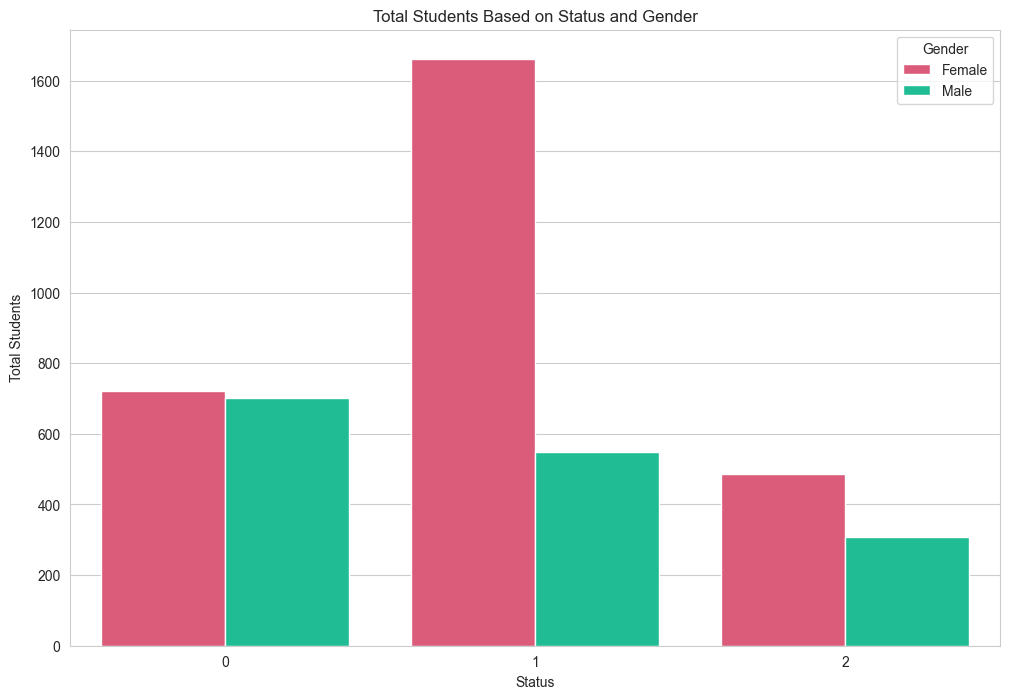

In [26]:
status_counts = eda_df.groupby(['Status', 'Gender']).size().reset_index(name='Total Students')
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Status', y='Total Students', hue='Gender', data=status_counts, palette=['#EF476F', '#06D6A0'])
plt.xlabel('Status')
plt.ylabel('Total Students')
plt.title('Total Students Based on Status and Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()

<Figure size 1200x800 with 0 Axes>

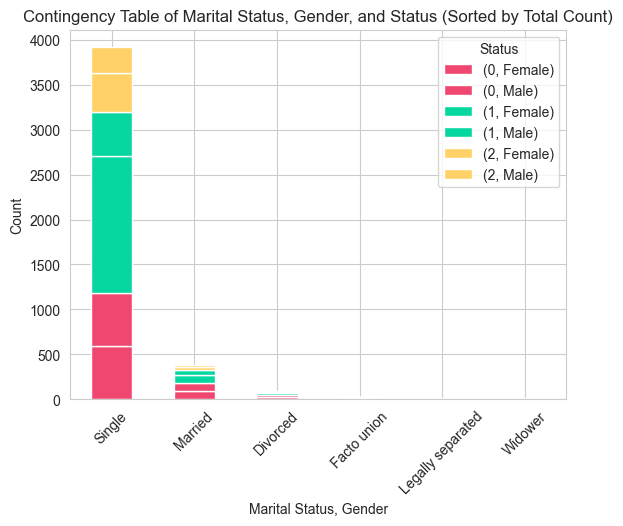

In [27]:
from matplotlib.colors import ListedColormap

crosstab_result = pd.crosstab(index=[eda_df['Marital_status'], eda_df['Gender']], columns=eda_df['Status'])
crosstab_result = crosstab_result.unstack().fillna(0)
crosstab_result['Total'] = crosstab_result.sum(axis=1)
crosstab_result_sorted = crosstab_result.sort_values(by='Total', ascending=False)
crosstab_result_sorted.drop('Total', axis=1, inplace=True)

colors = ['#EF476F', '#06D6A0', '#FFD166']
cmap = ListedColormap(sns.color_palette(colors).as_hex())

plt.figure(figsize=(12, 8))
crosstab_result_sorted.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Marital Status, Gender')
plt.ylabel('Count')
plt.title('Contingency Table of Marital Status, Gender, and Status (Sorted by Total Count)')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

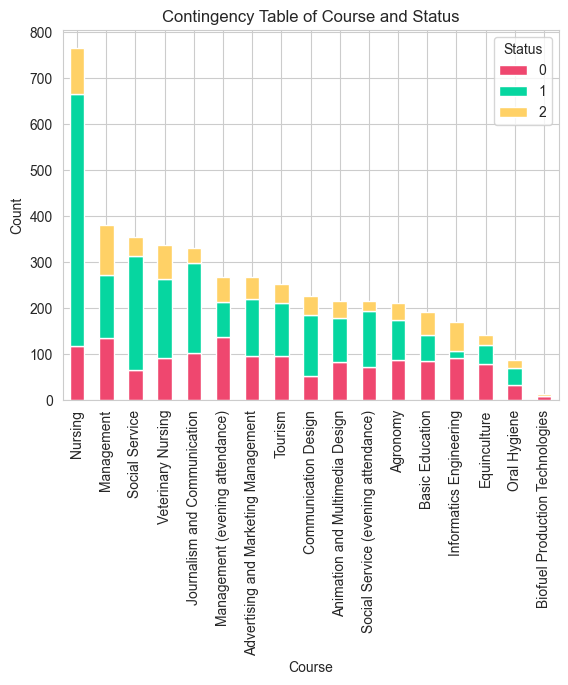

In [28]:
crosstab_result = pd.crosstab(index=eda_df['Course'], columns=eda_df['Status'], margins=True)
crosstab_result_sorted = crosstab_result.sort_values(by='All', ascending=False)
crosstab_result_sorted.drop('All', axis=0, inplace=True)

plt.figure(figsize=(14, 8))
crosstab_result_sorted.drop('All', axis=1).plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Contingency Table of Course and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x800 with 0 Axes>

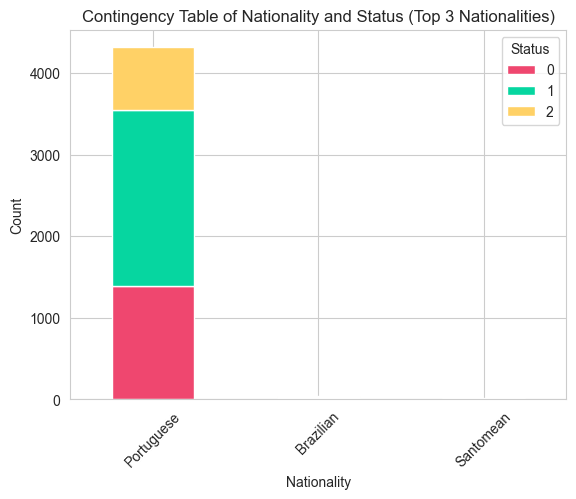

In [29]:

# Create the contingency table
crosstab_result = pd.crosstab(index=eda_df['Nationality'], columns=eda_df['Status'], margins=True)
crosstab_result_sorted = crosstab_result.sort_values(by='All', ascending=False)
crosstab_result_sorted = crosstab_result_sorted.drop('All', axis=1)
crosstab_result_sorted = crosstab_result_sorted.drop('All', axis=0)
top_3_nationalities = crosstab_result_sorted.head(3)

colors = ['#EF476F', '#06D6A0', '#FFD166']
cmap = ListedColormap(sns.color_palette(colors).as_hex())

plt.figure(figsize=(12, 8))
top_3_nationalities.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Contingency Table of Nationality and Status (Top 3 Nationalities)')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

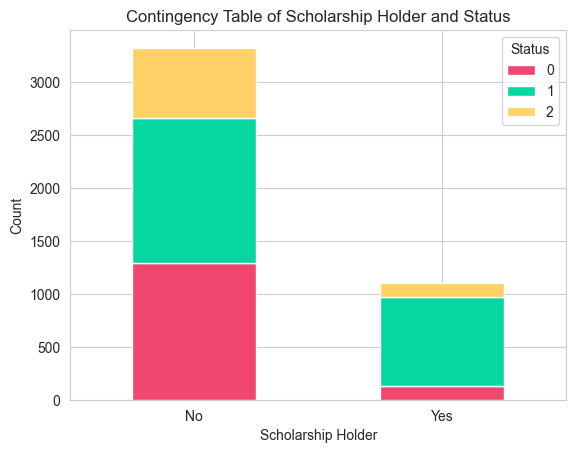

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
crosstab_result = pd.crosstab(index=eda_df['Scholarship_holder'], columns=eda_df['Status'])

colors = ['#EF476F', '#06D6A0', '#FFD166']
cmap = ListedColormap(sns.color_palette(colors).as_hex())

# Plotting
plt.figure(figsize=(10, 6))
crosstab_result.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.title('Contingency Table of Scholarship Holder and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

In [31]:
def GroupAge(age):
  if age <= 30:
    return '17-30'
  elif age >= 30 and age <= 40:
    return '30-40'
  elif age > 40:
    return '> 40'

eda_df['Age_at_enrollment'] = eda_df['Age_at_enrollment'].apply(GroupAge)

<Figure size 1200x600 with 0 Axes>

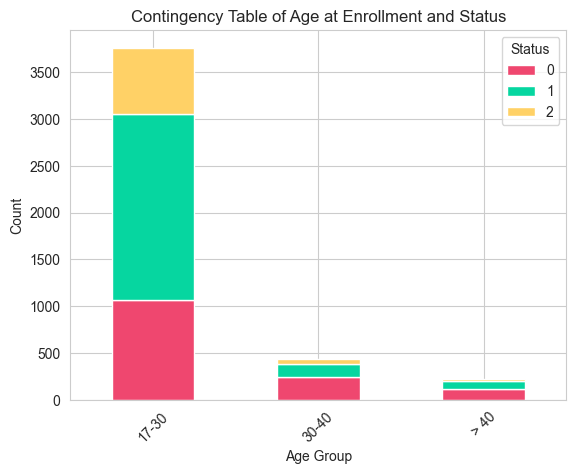

In [32]:
# Create the contingency table
crosstab_result = pd.crosstab(index=eda_df['Age_at_enrollment'], columns=eda_df['Status'])

colors = ['#EF476F', '#06D6A0', '#FFD166']
cmap = ListedColormap(sns.color_palette(colors).as_hex())

# Plotting
plt.figure(figsize=(12, 6))
crosstab_result.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Contingency Table of Age at Enrollment and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

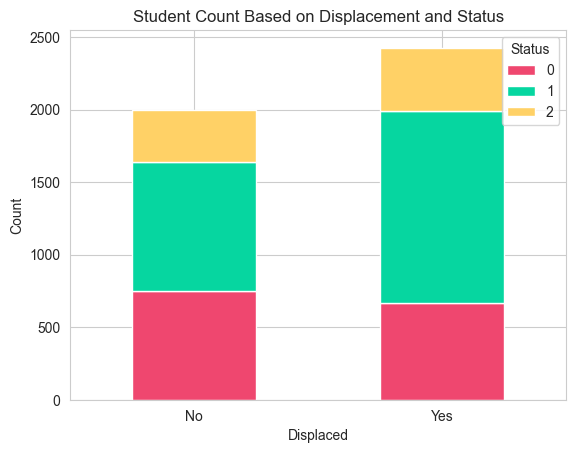

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
displaced_status_counts = eda_df.groupby(['Displaced', 'Status']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
displaced_status_counts.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Displaced')
plt.ylabel('Count')
plt.title('Student Count Based on Displacement and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

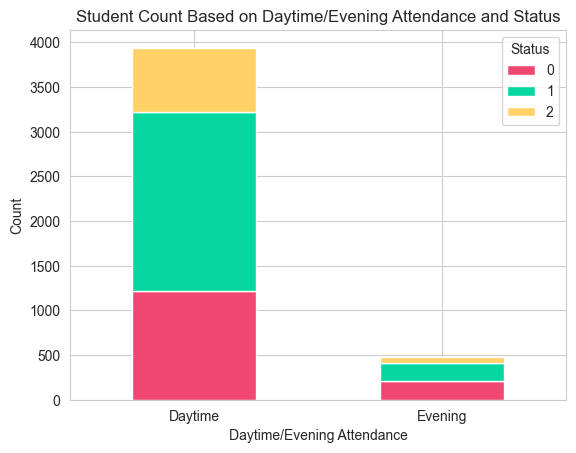

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
attendance_status_counts = eda_df.groupby(['Daytime_evening_attendance', 'Status']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
attendance_status_counts.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Daytime/Evening Attendance')
plt.ylabel('Count')
plt.title('Student Count Based on Daytime/Evening Attendance and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

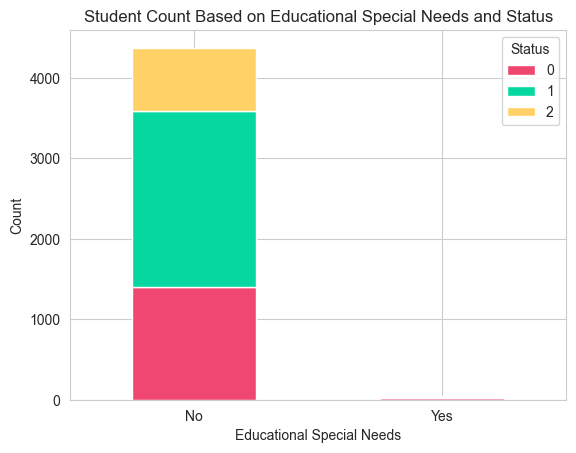

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
special_needs_status_counts = eda_df.groupby(['Educational_special_needs', 'Status']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
special_needs_status_counts.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Educational Special Needs')
plt.ylabel('Count')
plt.title('Student Count Based on Educational Special Needs and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

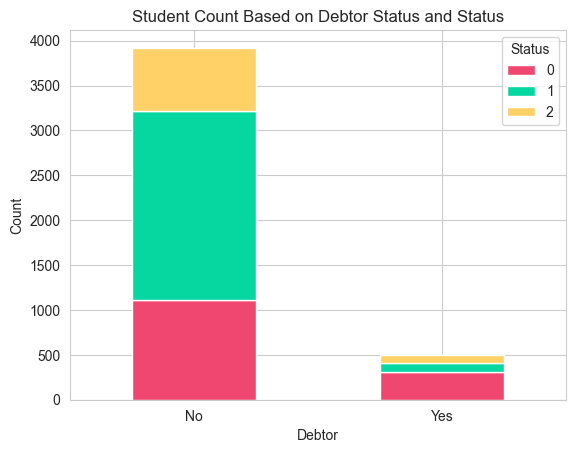

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
debtor_status_counts = eda_df.groupby(['Debtor', 'Status']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
debtor_status_counts.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Student Count Based on Debtor Status and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

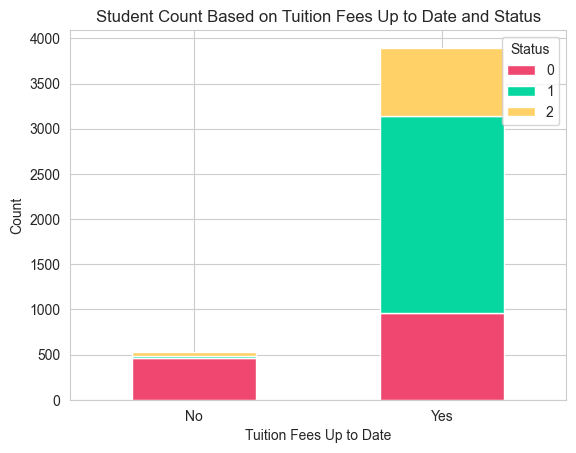

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
tuition_status_counts = eda_df.groupby(['Tuition_fees_up_to_date', 'Status']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
tuition_status_counts.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Count')
plt.title('Student Count Based on Tuition Fees Up to Date and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

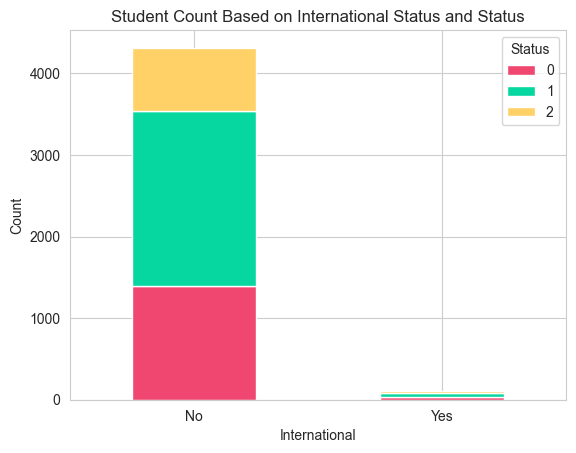

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the contingency table
international_status_counts = eda_df.groupby(['International', 'Status']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
international_status_counts.plot(kind='bar', stacked=True, colormap=cmap)
plt.xlabel('International')
plt.ylabel('Count')
plt.title('Student Count Based on International Status and Status')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## Imbalanced Data

Berdasarkan hasil perbandingan jumlah siswa dropout, graduate, & enrolled sebelumnya, terlihat jumlah data tersebut tidak seimbang (imbalance data). Sehingga perlu adanya penanganan terhadap data yang tidak seimbang, karena data yang tidak seimbang dapat mengakibatkan bias pada model dan hasil akurasi dapat menjadi tidak akurat.

In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Split data
X = df.drop('Status', axis=1)
y = df['Status']

# Oversampling using SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)
counter_over = Counter(y_over)

print("Setelah oversampling:", counter_over)

Setelah oversampling: Counter({0: 2209, 1: 2209, 2: 2209})


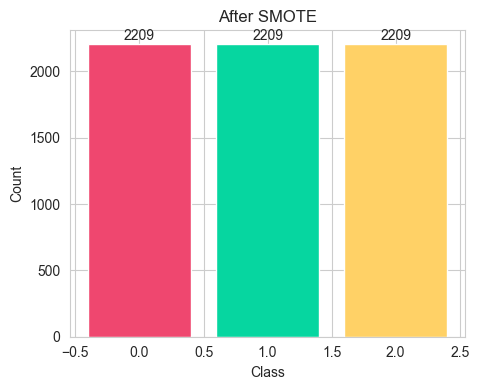

In [40]:
plt.figure(figsize=(9, 4))

colors = ['#EF476F', '#06D6A0', '#FFD166']

plt.subplot(1, 2, 2)
plt.bar(counter_over.keys(), counter_over.values(), color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('After SMOTE')
plt.ylim([0, max(counter_over.values()) + 100])

for i, v in enumerate(counter_over.values()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1)
y = df.Status

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=123)

Berdasarkan eksperimen pengembangan model machine learning yang telah dilakukan, diperoleh bahwa model dengan accuracy atau performa terbaik yaitu model yang menggunakan pembagian data train 80% : 20% data test.

## Standardization

Sebelum mengembangkan model pembelajaran mesin, terlebih dahulu dilakukan proses standarisasi. Tahap ini digunakan untuk mengolah fitur-fitur numerik pada data sehingga memiliki mean 0 dan standar deviasi 1. Salah satu tujuan standardisasi adalah karena banyak algoritma pembelajaran mesin yang berkinerja lebih baik atau stabil ketika fitur numerik diaktifkan. skala yang sama. Dengan standarisasi, fitur-fitur ini diperlakukan secara seragam, sehingga dapat meningkatkan performa model.

In [43]:
# standardization using StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train_prepared = num_pipeline.fit_transform(X_train)
X_test_prepared = num_pipeline.transform(X_test)

In [44]:
X_train_prepared

array([[-0.28372756, -0.94210095, -0.5184969 , ..., -1.52174616,
         1.03062248,  0.15597581],
       [-0.28372756, -1.05721031,  2.82219232, ...,  1.85740343,
        -0.71214116, -0.41511604],
       [ 1.54378131, -0.71188223, -0.5184969 , ...,  0.95367737,
        -1.16677515,  0.37243805],
       ...,
       [-0.28372756, -0.13633543,  1.98702001, ...,  1.85740343,
        -0.71214116, -0.41511604],
       [-0.28372756, -0.13633543, -0.5184969 , ..., -0.8144823 ,
        -1.54563681, -1.42834351],
       [-0.28372756,  1.12986753, -0.5184969 , ..., -0.26438818,
         0.1213545 ,  0.80996809]])

In [45]:
X_test_prepared

array([[-0.28372756, -1.05721031,  2.82219232, ...,  0.36429082,
        -0.56059649,  0.83299599],
       [-0.28372756,  1.12986753, -0.5184969 , ...,  1.85740343,
        -0.71214116, -0.41511604],
       [-0.28372756, -1.05721031,  1.15184771, ...,  1.85740343,
        -0.71214116, -0.41511604],
       ...,
       [-0.28372756, -0.13633543,  0.31667541, ..., -1.52174616,
         1.03062248,  0.15597581],
       [-0.28372756, -0.13633543, -0.5184969 , ..., -0.0177917 ,
        -0.14613767,  0.81900068],
       [-0.28372756, -0.25144479, -0.5184969 , ..., -0.85997959,
        -1.37990964, -1.32642646]])

## Modelling

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating accuracy
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 2)
    test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)

    print("Train Accuracy:", train_accuracy, "%")
    print("Test Accuracy:", test_accuracy, "%")

    # Plotting confusion matrix
    plt.figure(figsize=(6, 3))
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    plt.subplot(1, 2, 1)
    sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Train Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(1, 2, 2)
    sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Printing classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy

Train Accuracy: 77.04 %
Test Accuracy: 75.49 %


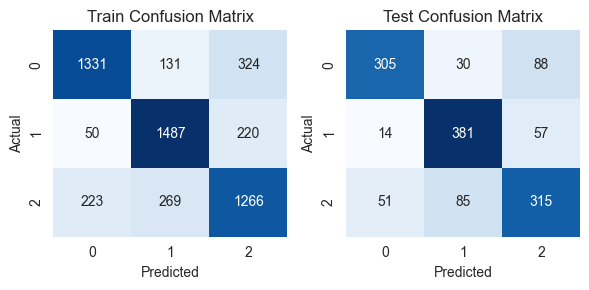


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       423
           1       0.77      0.84      0.80       452
           2       0.68      0.70      0.69       451

    accuracy                           0.75      1326
   macro avg       0.76      0.75      0.75      1326
weighted avg       0.76      0.75      0.75      1326



(77.04, 75.49)

In [47]:
# Lotistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression(random_state=123)

train_and_evaluate_model(logisticRegressionModel, X_train_prepared, y_train, X_test_prepared, y_test)

Train Accuracy: 88.0 %
Test Accuracy: 73.08 %


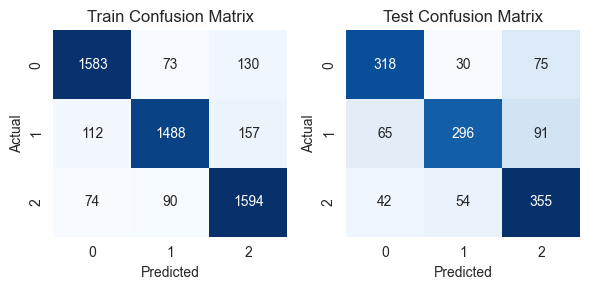


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       423
           1       0.78      0.65      0.71       452
           2       0.68      0.79      0.73       451

    accuracy                           0.73      1326
   macro avg       0.74      0.73      0.73      1326
weighted avg       0.74      0.73      0.73      1326



(88.0, 73.08)

In [48]:
# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)

train_and_evaluate_model(knnModel, X_train_prepared, y_train, X_test_prepared, y_test)

Train Accuracy: 99.85 %
Test Accuracy: 83.86 %


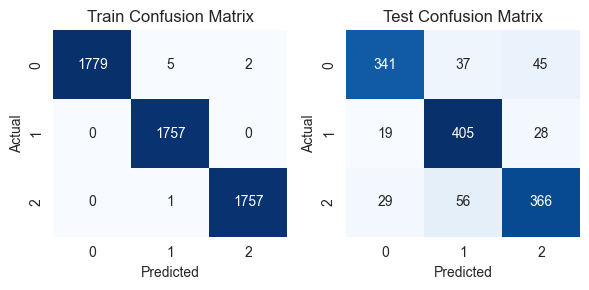


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       423
           1       0.81      0.90      0.85       452
           2       0.83      0.81      0.82       451

    accuracy                           0.84      1326
   macro avg       0.84      0.84      0.84      1326
weighted avg       0.84      0.84      0.84      1326



(99.85, 83.86)

In [49]:
# XGBoost
from xgboost import XGBClassifier
xgbModel = XGBClassifier(tree_method='hist')

train_and_evaluate_model(xgbModel, X_train_prepared, y_train, X_test_prepared, y_test)

Train Accuracy: 76.85 %
Test Accuracy: 74.74 %


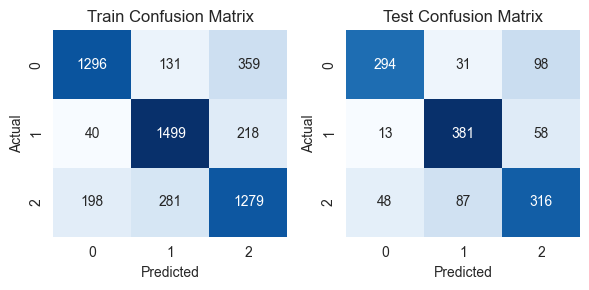


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       423
           1       0.76      0.84      0.80       452
           2       0.67      0.70      0.68       451

    accuracy                           0.75      1326
   macro avg       0.75      0.75      0.75      1326
weighted avg       0.75      0.75      0.75      1326



(76.85, 74.74)

In [50]:
# support vector machine model
from sklearn import svm
svmModel = svm.SVC(kernel='linear',probability=True)

train_and_evaluate_model(svmModel, X_train_prepared, y_train, X_test_prepared, y_test)

Train Accuracy: 100.0 %
Test Accuracy: 73.91 %


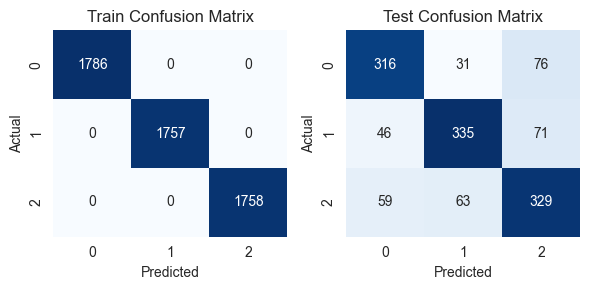


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       423
           1       0.78      0.74      0.76       452
           2       0.69      0.73      0.71       451

    accuracy                           0.74      1326
   macro avg       0.74      0.74      0.74      1326
weighted avg       0.74      0.74      0.74      1326



(100.0, 73.91)

In [51]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(random_state=123)
train_and_evaluate_model(decisionTreeModel, X_train_prepared, y_train, X_test_prepared, y_test)

Train Accuracy: 99.98 %
Test Accuracy: 82.28 %


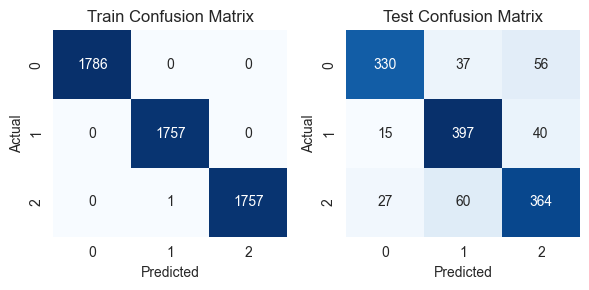


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       423
           1       0.80      0.88      0.84       452
           2       0.79      0.81      0.80       451

    accuracy                           0.82      1326
   macro avg       0.83      0.82      0.82      1326
weighted avg       0.83      0.82      0.82      1326



(99.98, 82.28)

In [52]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state=123)
train_and_evaluate_model(randomForestModel, X_train_prepared, y_train, X_test_prepared, y_test)

## Evaluate

In [53]:
# view the feature scores
feature_scores = pd.Series(xgbModel.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Curricular_units_2nd_sem_approved               0.194311
Tuition_fees_up_to_date                         0.113171
Scholarship_holder                              0.067913
Curricular_units_1st_sem_approved               0.054642
Curricular_units_2nd_sem_enrolled               0.046391
Curricular_units_1st_sem_enrolled               0.026103
Debtor                                          0.025889
Age_at_enrollment                               0.024329
Curricular_units_2nd_sem_evaluations            0.021652
Course                                          0.021001
Curricular_units_2nd_sem_credited               0.020542
Displaced                                       0.020238
Gender                                          0.020022
Curricular_units_2nd_sem_without_evaluations    0.019932
Unemployment_rate                               0.019755
Curricular_units_1st_sem_credited               0.019754
Curricular_units_1st_sem_without_evaluations    0.019177
Mothers_occupation             

## Save model

In [56]:
import joblib

In [57]:
joblib.dump(randomForestModel, 'xgbpipe.joblib')

['xgbpipe.joblib']

--- End of code ---